[Inhaltsverzeichnis](table_of_contents.ipynb)

In [1]:
%matplotlib
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import functions.sda_help as sh
import functions.PrettyTable as pt

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Kenngrößen von Dataframes
Dataframe: zweidimensionale, heterogene Datenstruktur mit markierten Achsen (Zeilen und Spalten). Dataframes können auf unterschiedliche Art erzeugt werden. Wir betrachten zunächst vorhandene Dataframes.

### Arbeit mit Dataframes
In dieser Übung werden Dataframes untersucht und visualisiert.

#### Einlesen von Dataframes

#### <font color="#FF0000">Eingabezelle</font>

In [2]:
df_name = 'df0.txt'

In [3]:
df = pd.read_pickle('data/' + df_name)

#### Anzeigemöglichkeiten

In [4]:
# letzte 5 Elemente
df.tail()

,x1,x2,Klasse
995,200.013251,204.967519,sieben
996,190.324674,213.039955,sieben
997,210.156452,193.733754,sieben
998,192.967568,216.070148,sieben
999,201.375303,179.203958,sieben


In [ ]:
# Zeilenbezeichnungen
df.index

In [ ]:
#Spaltennamen
df.columns

In [ ]:
#Datenwerte
df.values

In [ ]:
# Angabe statistischer Kenngrößen
df.describe()

In [ ]:
# Auswahl von Spalten
df['x1']

In [ ]:
# Auswahl von Zeilen
df[0:3]

In [5]:
# Zugriff über Zeilenname
df.loc[19]

,x1,x2,Klasse
19,68.846565,0.469638,eins
19,23.172055,57.015814,zwei
19,10.828509,8.832913,drei
19,79.046420,10.260517,vier
19,14.763668,169.006736,fuenf
19,67.193754,97.734884,sechs
19,196.836675,203.284315,sieben


In [10]:
# Zugriff über Position
df.iloc[3000:3002, 0:1]

,x1
0,79.128069
1,78.834436


In [ ]:
# boolescher Zugriff
df[df.Klasse == 'eins']

#### Operationen
Mittelwert pro Spalte

In [ ]:
df.mean()

Mittelwert pro Zeile

In [11]:
df.mean(1)

0       52.600120
1       58.999523
2       46.509658
3       47.134361
4       60.958449
5       60.437767
6       48.097077
7       40.479977
8       49.814080
9       29.493064
10      47.787463
11      52.790488
12      31.993640
13      38.527570
14      52.701964
15      46.734993
16      63.708698
17      60.315624
18      27.519480
19      34.658102
20      56.981893
21      44.926062
22      36.544563
23      34.616879
24      44.816278
25      49.331215
26      70.131346
27      66.392593
28      48.829703
29      53.844564
          ...    
970    202.641612
971    200.236295
972    204.799057
973    207.842204
974    193.351103
975    217.610179
976    189.681561
977    202.665205
978    186.762621
979    201.112707
980    207.939266
981    190.970019
982    206.093868
983    207.914488
984    204.434184
985    199.716380
986    203.353513
987    196.951126
988    217.489057
989    198.629158
990    188.667024
991    192.044077
992    205.421873
993    195.202599
994    196

### Verwendung von Sprachdaten
Es wird ein Dataframe verwendet, in dem von 31 Sprechern die Frequenzen des 1. und 2. Formanten der Vokale a, e, i, o und u enthalten sind.

In [12]:
speech_df = pd.read_csv('data/sprecher.csv', sep=';')

In [13]:
speech_df.describe()

,Sprecher,[a]F1,[a]F2,[e]F1,[e]F2,[i]F1,[i]F2,[o]F1,[o]F2,[u]F1,[u]F2
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,774.870968,1197.096774,360.612903,2229.451613,248.096774,2268.096774,396.161290,774.903226,265.225806,707.096774
std,9.092121,73.288354,104.829180,65.688496,182.300821,33.958165,193.588973,57.834878,103.335168,44.201591,76.732590
min,1.000000,650.000000,1050.000000,240.000000,2000.000000,200.000000,1900.000000,300.000000,600.000000,200.000000,503.000000
25%,8.500000,720.000000,1110.000000,300.000000,2100.000000,236.000000,2111.000000,350.000000,717.000000,240.000000,675.000000
50%,16.000000,770.000000,1188.000000,380.000000,2150.000000,250.000000,2300.000000,400.000000,750.000000,251.000000,710.000000
75%,23.500000,815.000000,1270.000000,400.000000,2300.000000,260.000000,2405.000000,430.000000,805.000000,295.000000,750.000000
max,31.000000,970.000000,1440.000000,504.000000,2750.000000,315.000000,2600.000000,500.000000,1080.000000,350.000000,900.000000


In [14]:
data = speech_df.values[:,1:]

In [16]:
data

array([[ 700, 1200,  400, 2100,  250, 2600,  400,  750,  250,  700],
       [ 650, 1200,  250, 2100,  200, 2250,  400,  750,  350,  750],
       [ 850, 1195,  420, 2240,  240, 2420,  500,  800,  250,  630],
       [ 730, 1240,  240, 2100,  240, 2300,  390,  760,  220,  730],
       [ 750, 1120,  300, 2070,  240, 2180,  360,  730,  200,  710],
       [ 770, 1310,  460, 2150,  315, 2560,  430,  830,  280,  750],
       [ 770, 1080,  350, 2100,  240, 1900,  430,  670,  315,  710],
       [ 655, 1200,  385, 2150,  315, 2440,  360, 1000,  280,  790],
       [ 710, 1100,  380, 2000,  240, 2100,  440,  735,  350,  760],
       [ 820, 1150,  350, 2100,  300, 2050,  500,  750,  320,  690],
       [ 850, 1150,  410, 2000,  200, 2100,  500,  760,  200,  750],
       [ 710, 1100,  240, 2300,  200, 2410,  500,  860,  240,  670],
       [ 740, 1090,  290, 2110,  210, 2180,  360,  790,  240,  760],
       [ 790, 1360,  410, 2090,  260, 2060,  430,  860,  260,  610],
       [ 800, 1200,  400, 2100,  2

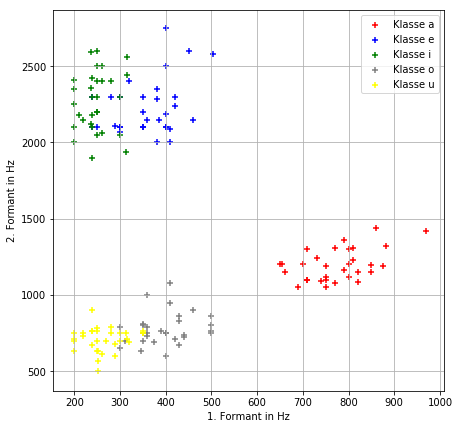

In [17]:
#a_f1 = data[:,1]
#a_f2 = data[:,2]
plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], color='red', marker='+', label='Klasse a')
plt.scatter(data[:,2], data[:,3], color='blue', marker='+', label='Klasse e')
plt.scatter(data[:,4], data[:,5], color='green', marker='+', label='Klasse i')
plt.scatter(data[:,6], data[:,7], color='grey', marker='+', label='Klasse o')
plt.scatter(data[:,8], data[:,9], color='yellow', marker='+', label='Klasse u')
plt.grid()
plt.xlabel('1. Formant in Hz')
plt.ylabel('2. Formant in Hz')
plt.legend()
plt.show()

In [ ]:
print('Datenmatrix:\n',data)
mean_vec = np.mean(data, axis=0)
print('Mittelwertvektor:\n',mean_vec.T)

In [ ]:
print('Varianzvektor:')
for i in np.arange(0, data.shape[1], 1):
    print(np.cov(data[:,i], ddof=0))

In [ ]:
cov_mat = np.cov(data.T, ddof=0)
print('Kovarianzmatrix:\n',cov_mat)

In [ ]:
cor_mat = np.corrcoef(data.T)
print('Korrelationsmatrix:\n',cor_mat)